# What is the distribution of anxiety reports within a high-performing student sample?

In [9]:
import pandas as pd

In [11]:
df = pd.read_csv("/data.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


Gender = categorical,
Age = Numeric, Course = categorical,
Current year of study = categorical,  CGPA = numeric,
Martial status & depression & anxiety & treatment = binary

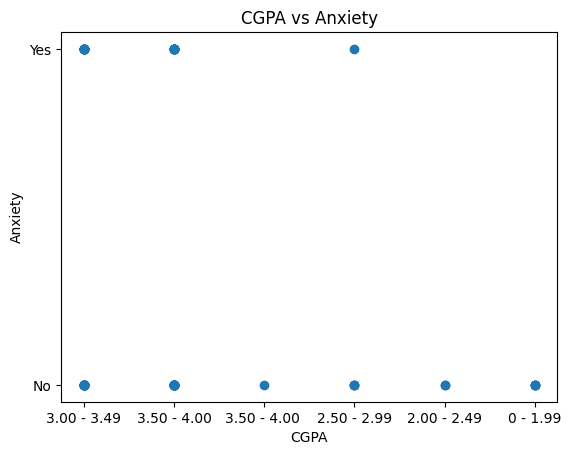

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df["What is your CGPA?"], df["Do you have Anxiety?"])
plt.xlabel("CGPA")
plt.ylabel("Anxiety")
plt.title("CGPA vs Anxiety")
plt.show()

-I see 9 points due to overlapping results (categorical cause)

-No trend but all Yes' come from higher GPA students with one from 2.5-2.99

-It isnt messy or clean but the data looks weird due to the low variability


In [16]:
df = df.rename(columns={
    "What is your current CGPA?": "CGPA"
})



In [18]:
df = df.rename(columns={
    "What is your CGPA?": "CGPA"
})

gpa_order = [
    "0 - 1.49",
    "1.50 - 1.99",
    "2.00 - 2.49",
    "2.50 - 2.99",
    "3.00 - 3.49",
    "3.50 - 4.00"
]

df["CGPA"] = pd.Categorical(
    df["CGPA"],
    categories=gpa_order,
    ordered=True
)

In [19]:
df["CGPA"].value_counts().sort_index()


,count
CGPA,
0 - 1.49,0
1.50 - 1.99,0
2.00 - 2.49,2
2.50 - 2.99,4
3.00 - 3.49,43
3.50 - 4.00,47


In [22]:
anxiety_counts = (
    df
    .groupby(["CGPA", "Do you have Anxiety?"])
    .size()
    .unstack(fill_value=0)
)

anxiety_counts

/tmp/ipython-input-1588422981.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["CGPA", "Do you have Anxiety?"])


Do you have Anxiety?,No,Yes
CGPA,,
0 - 1.49,0,0
1.50 - 1.99,0,0
2.00 - 2.49,2,0
2.50 - 2.99,3,1
3.00 - 3.49,28,15
3.50 - 4.00,29,18


In [25]:
anxiety_counts.sum(axis=1)


,0
CGPA,
0 - 1.49,0
1.50 - 1.99,0
2.00 - 2.49,2
2.50 - 2.99,4
3.00 - 3.49,43
3.50 - 4.00,47


In [23]:
anxiety_proportion = anxiety_counts.div(anxiety_counts.sum(axis=1), axis=0)
anxiety_proportion


Do you have Anxiety?,No,Yes
CGPA,,
0 - 1.49,NaN,NaN
1.50 - 1.99,NaN,NaN
2.00 - 2.49,1.000000,0.000000
2.50 - 2.99,0.750000,0.250000
3.00 - 3.49,0.651163,0.348837
3.50 - 4.00,0.617021,0.382979


1. The dataset is heavily skewed toward higher CGPA categories, with the majority of respondents reporting CGPAs above 3.0.
2. Because lower CGPA categories contain very few observations, comparisons of anxiety prevalence across CGPA ranges are limited.
3. While anxiety reports appear more frequently among higher CGPA students, this likely reflects the underlying sample distribution rather than a true association.
4. A more balanced sample would be required to assess the relationship between academic performance and anxiety.

In [26]:
(.348837 + .382979) / 2

0.365908

1. Approx 36.6% (over 1/3) of high-performing students (3.0-4.0) in this dataset reported having anxiety